## Introduction
---
The dataset provided by [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments) comprises a collection of observational data from 100k medical appointments in Brazil and is borne on the subject of whether patients show up for their appointment. Distinct characteristics and attributes about the patient are incorporated, for instance, Gender and Age just as every individual's essential health designation(s), e.g., Hypertension, Alcoholism, and Diabetes. A half-year of arrangement information is surveyed in this notebook.

### Data Wrangling

__Importing data analysis packages__ which is used in this analysis:

- Pandas.
- Numpy.
- Matplotlib.
- Seaborn

In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__Loading data__ into the Jupyter notebook

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__Information about the Dataset__

In [3]:
## Reading dataset general information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset includes 14 columns and 110527 data rows.
We're gonna explore the no-show appointments dataset dataset using this variables:

- PatientId: Identification of a patient 
- AppointmentID: Identification of every appointment
- Gender: Male or Female 
- ScheduledDay: The day of the genuine appointment, when they need to visit the specialist 
- AppointmentDay: The day somebody called or enrolled the appointment 
- Age: How old is the patient 
- Neighborhood: Where the appointment happens 
- Scholarship: True or False, shows if the patient is in the Bolsa Familia program 
- Hipertension: True or False 
- Diabetes: True or False 
- Alcoholism: True or False 
- Handcap: True or False 
- SMS_received: at least 1 messages sent to the patient 
- No-show "No" demonstrates if the patient appeared at their appointment and "Yes" in the event that they did not show up

And the above information shows that the dataset does not have any missing value but we will check below, since all the attributes have 110527 instances. However there is no guarantee these values are all consistent.

__Observations:__

- Changing PatientID information type from buoy to int will make the dataset simpler to work
- Taking time from the ScheduleDay column will make the dataset easier to work
- Taking time from the AppointmentDay column will make the dataset simpler to work

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap = 'coolwarm');

Looking at the charts above, we notice the data frame includes the two types of data:

1. __Categorical Data__: Gender, Hypertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show
2. __Quantitative Data__: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay

__Checking__ for __null values__

In [5]:
# Check if there is any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

__Checking__ for __duplicate values__

In [6]:
# Check for duplicate rows 
df.duplicated().sum()

0

In [7]:
# Check for duplicate appointmentID
sum(df.AppointmentID.duplicated())

0

__Observations:__
- no missing values exist in the provided dataset.
- no duplicate data exists in the dataset.

__Checking__ whether the dataset has valid values

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Check for zero/negative AppointmentID

df[df.AppointmentID <= 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [10]:
# Check for zero/negative PatientsId values
df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [11]:
# Check the values in the Gender column
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [13]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [14]:
# check the values in the Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [15]:
print(df['Neighbourhood'].nunique())
df['Neighbourhood'].unique()

81


array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [16]:
df['Scholarship'].unique()

array([0, 1])

In [17]:
df['Hipertension'].unique()

array([1, 0])

In [18]:
df['Diabetes'].unique()

array([0, 1])

In [19]:
df['Alcoholism'].unique()

array([0, 1])

In [20]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [21]:
df['SMS_received'].unique()

array([0, 1])

In [22]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

__Observations:__

- Minimum Age appears as -1. Any such patient will be assumed to be a newborn.
- Time portion in the AppointmentDay is set to zero, therefore, the time aspect of the appointment should be excluded.

### Data Cleaning
__Converting__ the column mispellings, __Incorporating__ underscores, and changed case

In [23]:
# Rename Columns
df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
              'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
              'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']

In [24]:
# Convert PatientID to integer 
df['PatientID'] = (df['PatientID']).astype('int64')

In [25]:
# Convert AppointmentDay and ScheduledDay to DateTime format  
# Note: Since the Appointment times were set to 00:00:00 in all the appointments, 
# our analysis will exclude the appointment time for both AppointmentDay and ScheduledDay

# Appointment Date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

In [26]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date
df['WaitingDays'] = df.AppointmentDay - df.ScheduledDay
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [27]:
# Checking which instances were scheduled after the appointment:
df[df['WaitingDays'] < '0 days']

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


__Observations__:

- Few inconsistent cases where the appointment was booked (recorded) after the actual appointment and the patient did not showed up. So, these cases can be discarded.

In [28]:
df = df[df['AppointmentDay'] >= df['ScheduledDay']]
df.shape

(110522, 15)

In [29]:
# Exclude the record with the negative Age value
df = df[df.Age != -1]
df.shape

(110521, 15)

In [30]:
# Replace 'M' and 'F' with 1 and 0 for 'Gender' and 'Yes' and 'No'
# with 1 and 0 for 'No-show'
df['Gender'] = df['Gender'].map({'M':1, 'F':0})
df['No_show'] = df['No_show'].map({'Yes':1, 'No':0})
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days


In [31]:
# DayofWeek 
df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name.astype('category')
df.DayofWeek.cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], 
                                    ordered = True, inplace = True)

In [32]:
# Convert WaitingDuration column to integer
df['WaitingDuration'] = (df.AppointmentDay - df.ScheduledDay).astype('timedelta64[D]').astype(int)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays,DayofWeek,WaitingDuration
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,Friday,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days,Friday,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days,Friday,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days,Friday,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days,Friday,0


In [33]:
# Age Groups Helpful for Visualization
AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

In [34]:
# Limit our dataset to appointments with NoShowUp status 
NoShow_df = df[df['No_show'] == 1]
NoShow_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays,DayofWeek,WaitingDuration,AgeGroup
6,733688164476661,5630279,0,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2 days,Friday,2,20 - 39
7,3449833394123,5630575,0,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2 days,Friday,2,20 - 39
11,7542951368435,5620163,1,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,3 days,Friday,3,20 - 39
17,14794966191172,5633460,0,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,1 days,Friday,1,40 - 59
20,622257462899397,5626083,0,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,2 days,Friday,2,20 - 39


### EDA: EXPLORING THE DATA

__Questions__

1. What is the overall appointment show-up vs. no show-up rate?
2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?
3. Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients? (the term recurring patients will be defined in the coming sections)

#### Q1. What is the overall appointment show-up vs. no show-up rate?

Understanding the magnitude of the no-show problem

Below is the split of values in 'No-show': 0 = showed up and 1 = didn't show up: 

0    88207
1    22314
Name: No_show, dtype: int64


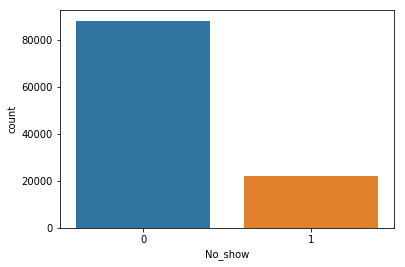

In [35]:
print ("Below is the split of values in 'No-show': 0 = showed up and 1 = didn't show up: \n")
print (df['No_show'].value_counts())
sns.countplot(x='No_show', data=df)

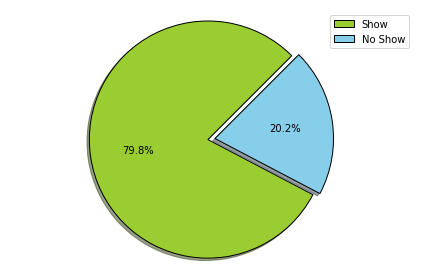

In [36]:
# Percentage of People who show up
plt.pie(df['No_show'].value_counts()/100,colors = ['yellowgreen', 'skyblue'], 
        shadow=True, explode=(0, 0.06), autopct='%1.1f%%', startangle = 45,
        wedgeprops={"edgecolor":"0",'linewidth': 1,'antialiased': True})
plt.axis('equal')
plt.tight_layout()
plt.legend(['Show', 'No Show'],  loc="best")
plt.show()

Looking at the pie chart above, the overall show-up rate is __79.8%__.

#### Q2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?

In [37]:
def autolabel(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

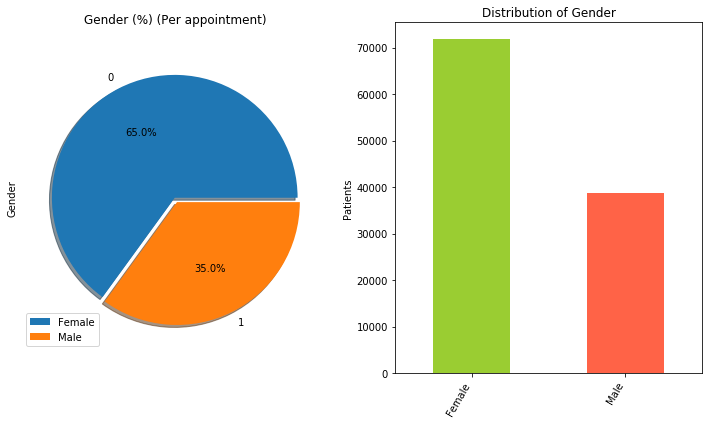

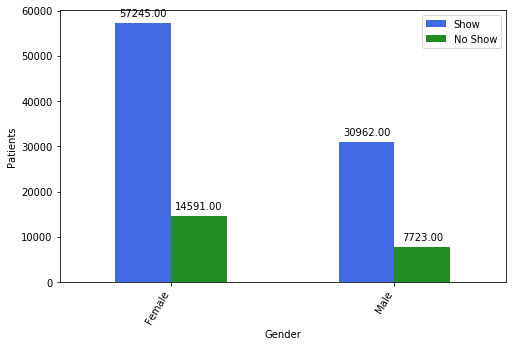

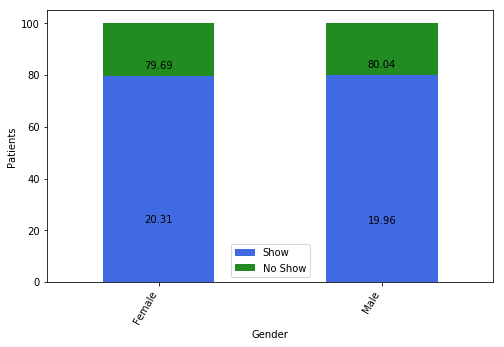

In [38]:
## Plotting gender distribution
fig = plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
df_pie = (df['Gender'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode=(0, 0.04), autopct='%1.1f%%')
ax1.set_title('Gender (%) (Per appointment)\n');
ax1.legend(labels=['Female','Male'],  loc="best")

plt.subplot(1,2,2)
df_bar = df['Gender'].value_counts()
ax2 = df_bar.plot.bar(color=['yellowgreen','tomato'])
ax2.set_xticklabels(["Female", "Male"], rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of Gender')
plt.tight_layout()
plt.show()

df_count = pd.crosstab(df['Gender'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(8,5), color=['royalblue','forestgreen'])
ax3.set_xticklabels(['Female','Male'], rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['Gender'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True, figsize=(8,5), color=['royalblue','forestgreen'])
ax4.set_xticklabels(['Female','Male'], rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()


- Looking at the chart above, we find that the appointment proportion where patients are females is 65%, where the proportion of appointments where patients are males is 35%.
- 

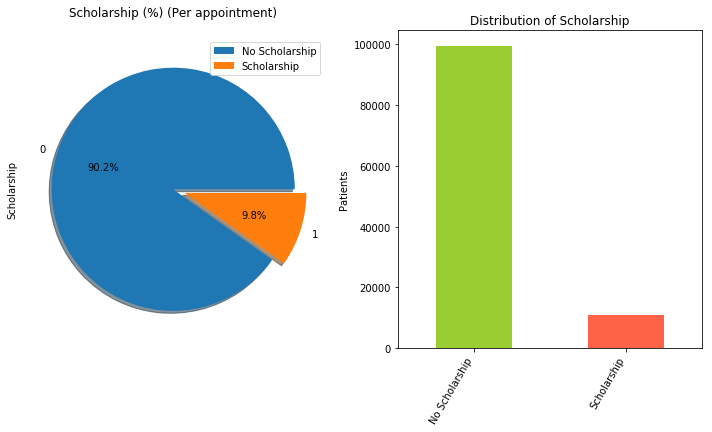

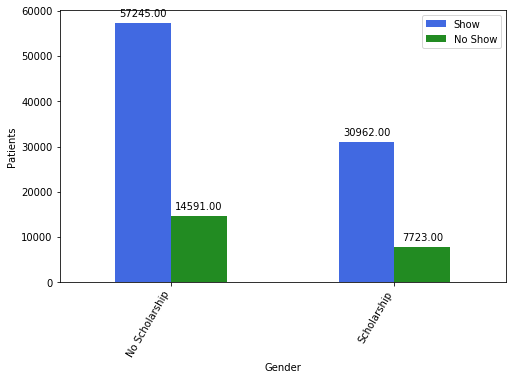

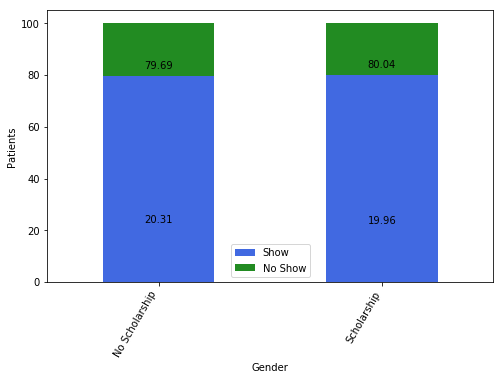

In [39]:
## Plotting gender distribution
fig = plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
df_pie = (df['Scholarship'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode=(0, 0.1), autopct='%1.1f%%')
ax1.set_title('Scholarship (%) (Per appointment)\n');
ax1.legend(labels=["No Scholarship", "Scholarship"],  loc="best")

plt.subplot(1,2,2)
df_bar = df['Scholarship'].value_counts()
ax2 = df_bar.plot.bar(color=['yellowgreen','tomato'])
ax2.set_xticklabels(["No Scholarship", "Scholarship"], rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of Scholarship')
plt.tight_layout()
plt.show()

df_count = pd.crosstab(df['Gender'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(8,5), color=['royalblue','forestgreen'])
ax3.set_xticklabels(["No Scholarship", "Scholarship"], rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['Gender'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True, figsize=(8,5), color=['royalblue','forestgreen'])
ax4.set_xticklabels(["No Scholarship", "Scholarship"], rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()

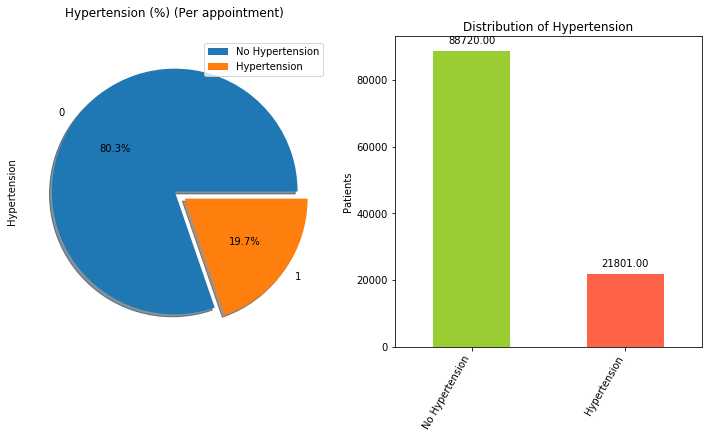

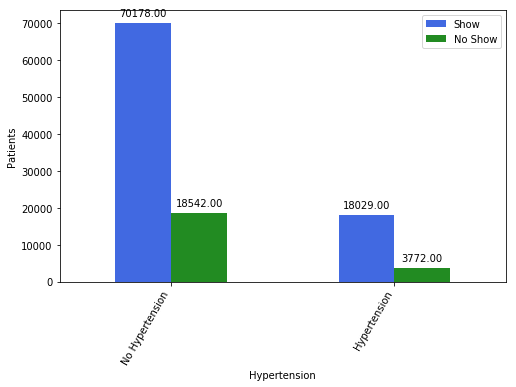

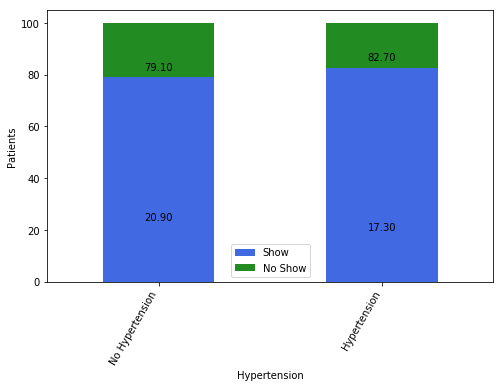

In [40]:
## Plotting gender distribution
fig = plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
df_pie = (df['Hypertension'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode=(0, 0.1), autopct='%1.1f%%')
ax1.set_title('Hypertension (%) (Per appointment)\n');
ax1.legend(labels=["No Hypertension", "Hypertension"],  loc="best")

plt.subplot(1,2,2)
df_bar = df['Hypertension'].value_counts()
ax2 = df_bar.plot.bar(color=['yellowgreen','tomato'])
ax2.set_xticklabels(["No Hypertension", "Hypertension"], rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of Hypertension')
autolabel(ax2)
plt.tight_layout()

df_count = pd.crosstab(df['Hypertension'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(8,5), color=['royalblue','forestgreen'])
ax3.set_xticklabels(["No Hypertension", "Hypertension"], rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['Hypertension'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True, figsize=(8,5), color=['royalblue','forestgreen'])
ax4.set_xticklabels(["No Hypertension", "Hypertension"], rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()

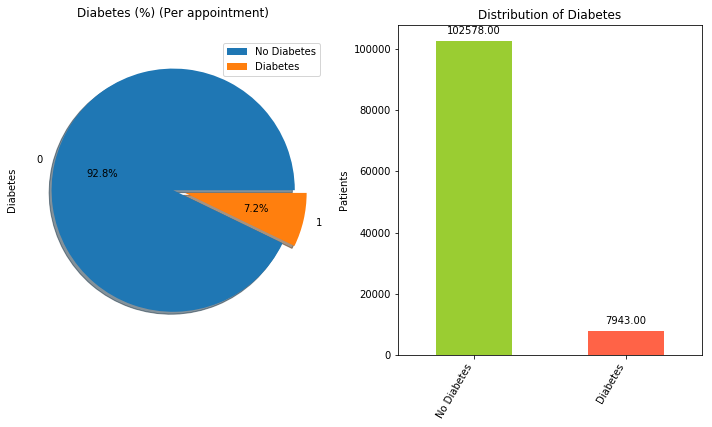

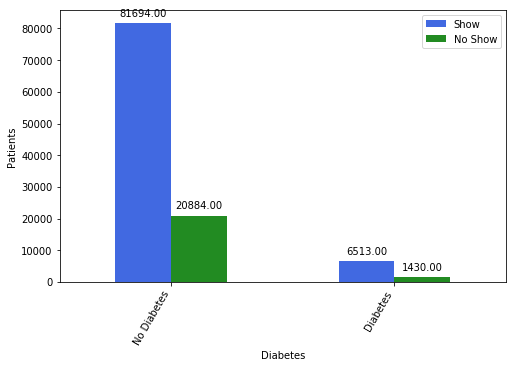

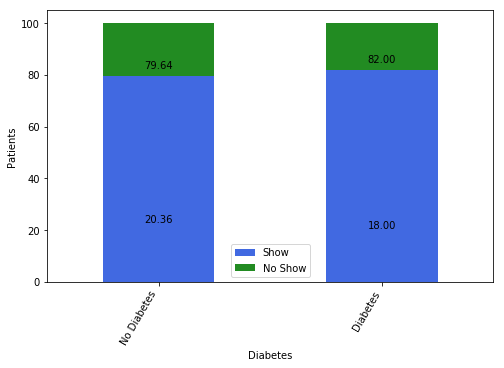

In [41]:
fig = plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
df_pie = (df['Diabetes'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode=(0, 0.1), autopct='%1.1f%%')
ax1.set_title('Diabetes (%) (Per appointment)\n');
ax1.legend(labels=["No Diabetes", "Diabetes"],  loc="best")

plt.subplot(1,2,2)
df_bar = df['Diabetes'].value_counts()
ax2 = df_bar.plot.bar(color=['yellowgreen','tomato'])
ax2.set_xticklabels(["No Diabetes", "Diabetes"], rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of Diabetes')
autolabel(ax2)
plt.tight_layout()
plt.show()

df_count = pd.crosstab(df['Diabetes'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(8,5), color=['royalblue','forestgreen'])
ax3.set_xticklabels(["No Diabetes", "Diabetes"], rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['Diabetes'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True, figsize=(8,5), color=['royalblue','forestgreen'])
ax4.set_xticklabels(["No Diabetes", "Diabetes"], rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()

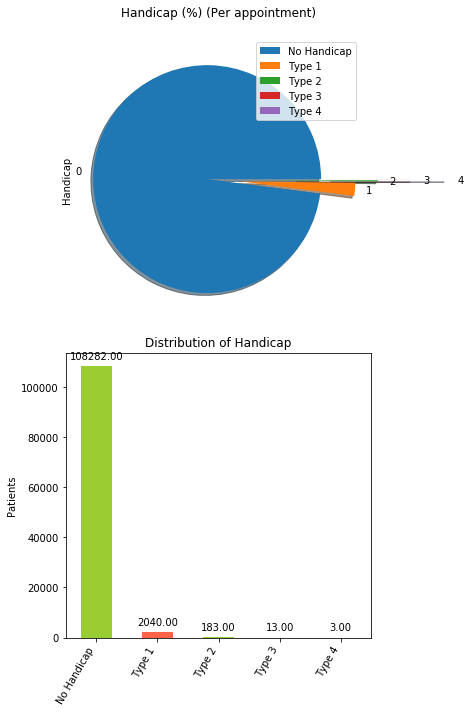

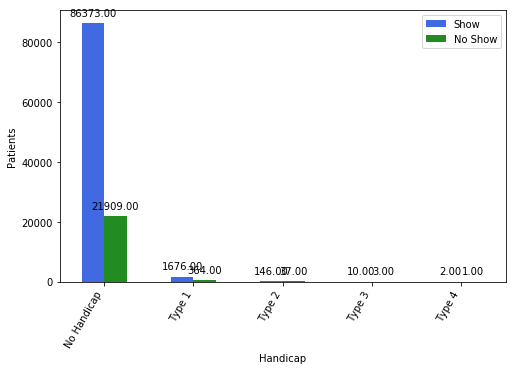

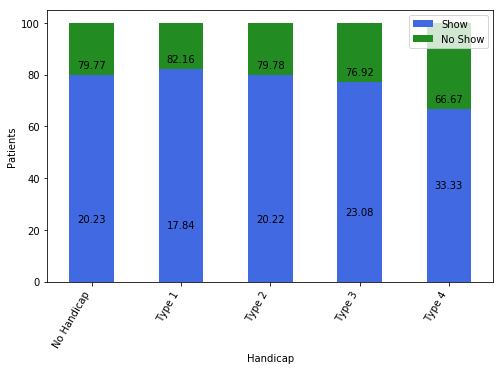

In [42]:
fig = plt.subplots(figsize=(6,10))

plt.subplot(2,1,1)
df_pie = (df['Handicap'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode= (0.1, 0.2, 0.4, 0.7, 1.0))
ax1.set_title('Handicap (%) (Per appointment)\n');
ax1.legend(labels=["No Handicap", "Type 1", "Type 2", "Type 3", "Type 4"],  loc="best")

plt.subplot(2,1,2)
df_bar = df['Handicap'].value_counts()
ax2 = df_bar.plot.bar(color=['yellowgreen','tomato'])
ax2.set_xticklabels(["No Handicap", "Type 1", "Type 2", "Type 3", "Type 4"], rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of Handicap')
autolabel(ax2)
plt.tight_layout()

df_count = pd.crosstab(df['Handicap'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(8,5), color=['royalblue','forestgreen'])
ax3.set_xticklabels(["No Handicap", "Type 1", "Type 2", "Type 3", "Type 4"], rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['Handicap'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True, figsize=(8,5), color=['royalblue','forestgreen'])
ax4.set_xticklabels(["No Handicap", "Type 1", "Type 2", "Type 3", "Type 4"], rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()

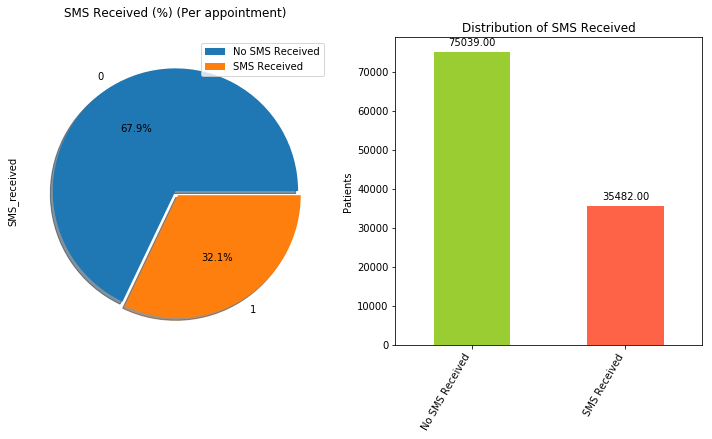

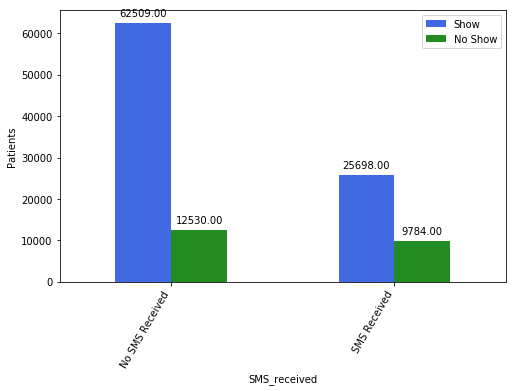

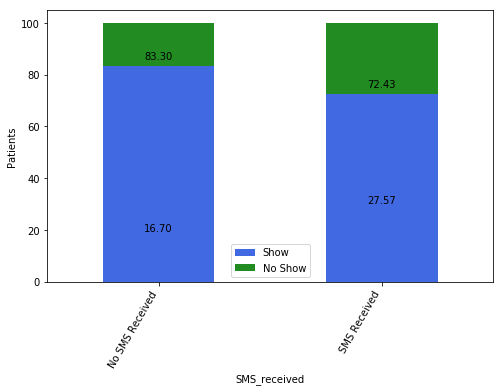

In [43]:
fig = plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
df_pie = (df['SMS_received'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode=(0, 0.04), autopct='%1.1f%%')
ax1.set_title('SMS Received (%) (Per appointment)\n');
ax1.legend(labels=["No SMS Received", "SMS Received"],  loc="best")

plt.subplot(1,2,2)
df_bar = df['SMS_received'].value_counts()
ax2 = df_bar.plot.bar(color=['yellowgreen','tomato'])
ax2.set_xticklabels(["No SMS Received", "SMS Received"], rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of SMS Received')
autolabel(ax2)
plt.tight_layout()

df_count = pd.crosstab(df['SMS_received'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(8,5), color=['royalblue','forestgreen'])
ax3.set_xticklabels(["No SMS Received", "SMS Received"], rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['SMS_received'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True, figsize=(8,5), color=['royalblue','forestgreen'])
ax4.set_xticklabels(["No SMS Received", "SMS Received"], rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()

In [44]:
neighborhood = df.Neighbourhood.unique()
neighborhood.sort()

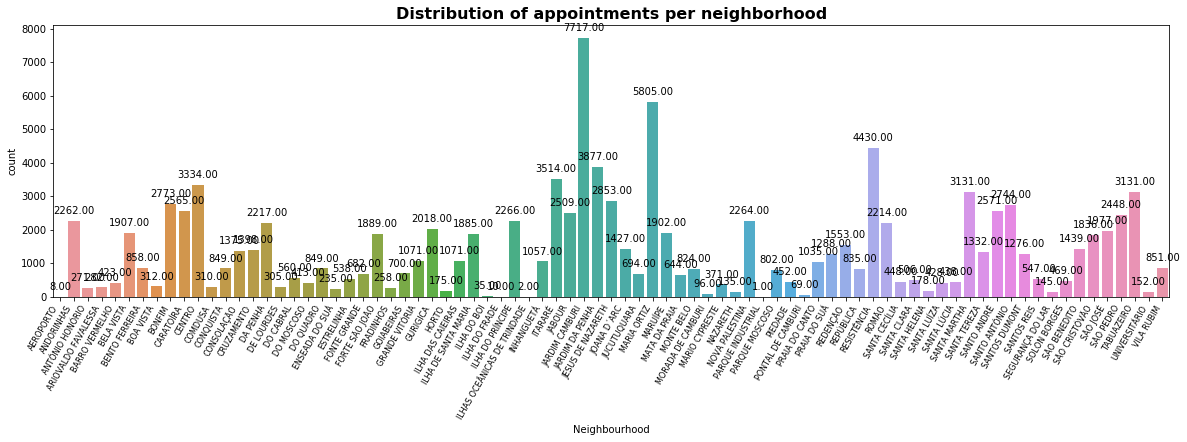

In [45]:
## Plotting an histogram with the neighborhoods sorted alphabetically. 
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Neighbourhood', data=df, order=neighborhood)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right", fontsize=8)
autolabel(ax)
plt.title('Distribution of appointments per neighborhood', fontsize=16, fontweight='semibold')
plt.show()

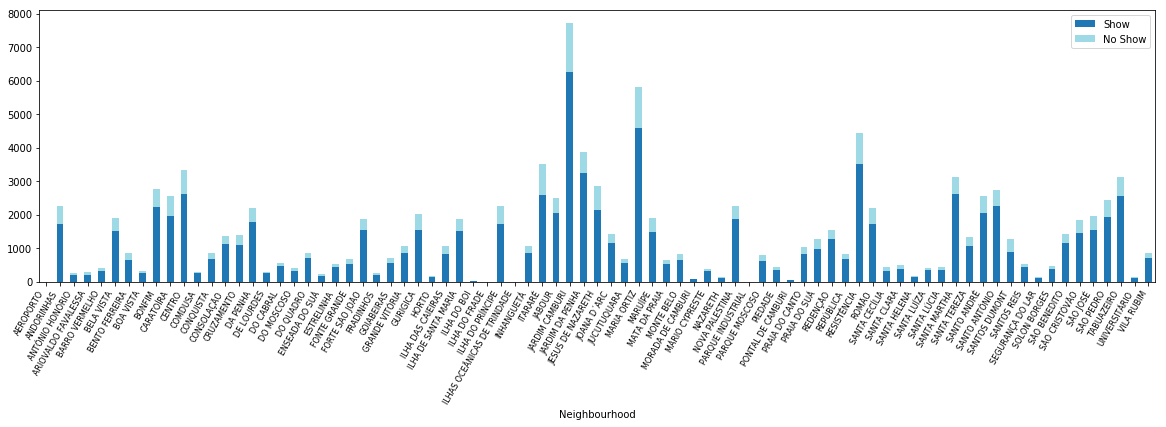

In [46]:
df_count = pd.crosstab(df['Neighbourhood'], df['No_show'])
ax = df_count.plot.bar(stacked = True, figsize=(20,5), cmap = 'tab20'); 
ax.set_xticklabels(neighborhood, rotation=60, ha="right", fontsize=8)
ax.legend(labels=['Show', 'No Show'])
plt.show()

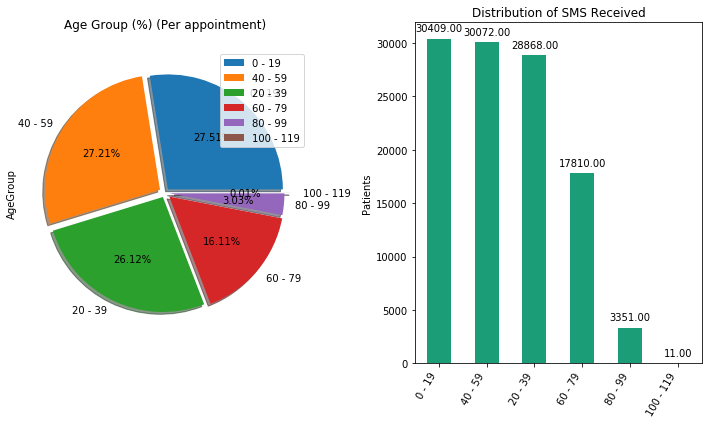

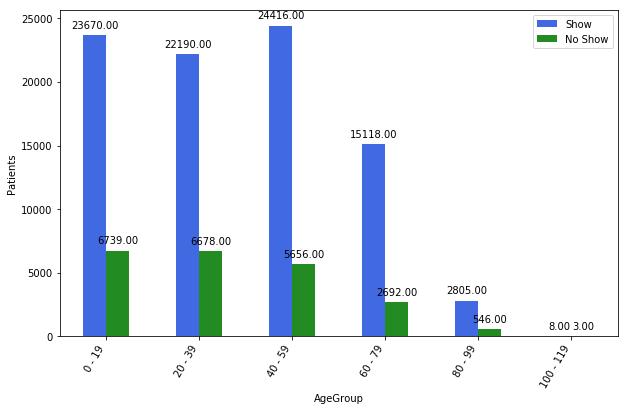

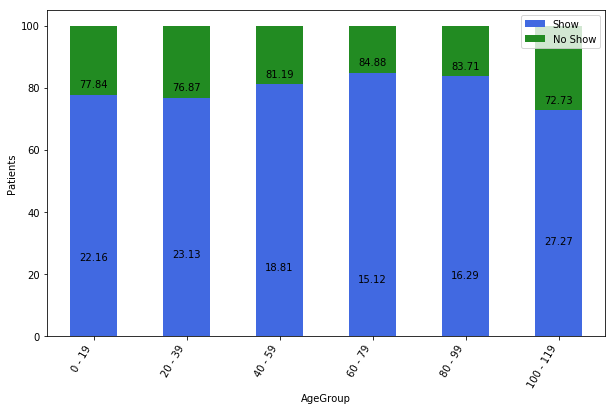

In [47]:
fig = plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
df_pie = (df['AgeGroup'].value_counts()/100)
ax1 = df_pie.plot.pie(shadow=True, explode = (0.04, 0.05, 0.04, 0.05, 0.04, 0.1) ,autopct='%1.2f%%')
ax1.set_title('Age Group (%) (Per appointment)\n');
ax1.legend(loc="best")

plt.subplot(1,2,2)
df_bar = df['AgeGroup'].value_counts()
ax2 = df_bar.plot.bar(cmap='Dark2')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha="right")
ax2.set_ylabel("Patients")
ax2.set_title('Distribution of SMS Received')
autolabel(ax2)
plt.tight_layout()
plt.show()

df_count = pd.crosstab(df['AgeGroup'], df['No_show'])
ax3 = df_count.plot.bar(figsize=(10,6), color=['royalblue','forestgreen'])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60, ha="right")
ax3.set_ylabel("Patients")
ax3.legend(labels=['Show', 'No Show'])
autolabel(ax3)

df_count = pd.crosstab(df['AgeGroup'], df['No_show'], normalize = 'index')*100
ax4 = df_count.plot.bar(stacked = True,figsize=(10,6), color=['royalblue','forestgreen'])
ax4.set_xticklabels(ax3.get_xticklabels(), rotation=60, ha="right")
ax4.set_ylabel("Patients")
ax4.legend(labels=['Show', 'No Show'])
autolabel(ax4)

plt.show()